<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    object 
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
61

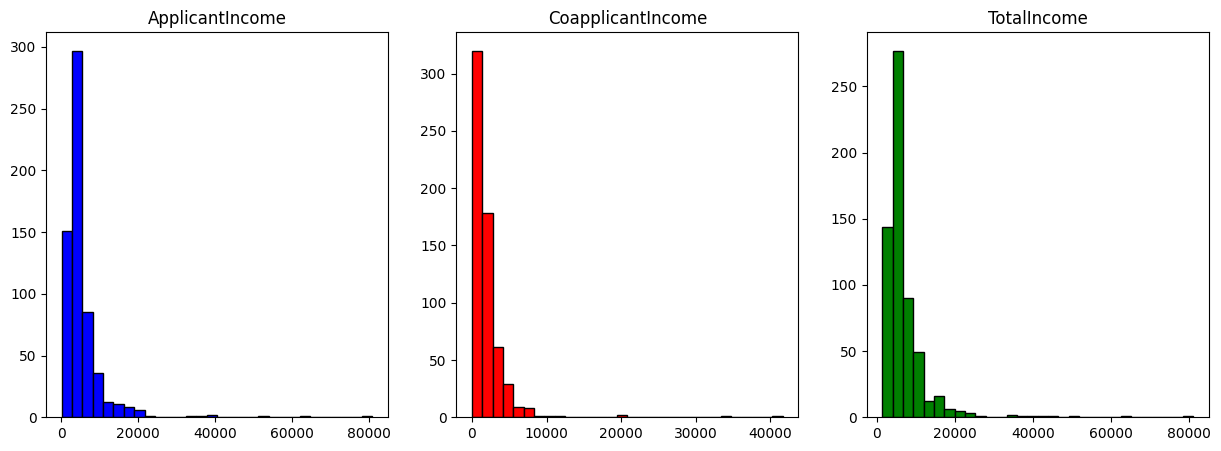

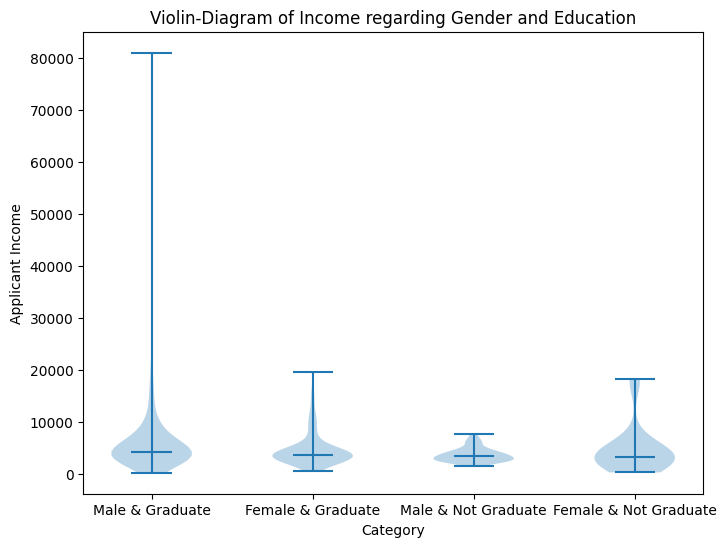

                    Gender   Married  Education  Self_Employed  LoanAmount  \
Gender            1.000000 -0.369612   0.049258       0.009829   -0.106947   
Married          -0.369612  1.000000  -0.014223       0.001909    0.149519   
Education         0.049258 -0.014223   1.000000       0.012333    0.171133   
Self_Employed     0.009829  0.001909   0.012333       1.000000    0.123931   
LoanAmount       -0.106947  0.149519   0.171133       0.123931    1.000000   
Loan_Amount_Term  0.075117 -0.103810   0.078784      -0.037069    0.039447   
Credit_History   -0.016337  0.004381   0.081822       0.003883   -0.008433   
Loan_Status      -0.019857  0.089280   0.085884      -0.002303   -0.037318   
TotalIncome      -0.091341  0.085357   0.162582       0.129639    0.624077   

                  Loan_Amount_Term  Credit_History  Loan_Status  TotalIncome  
Gender                    0.075117       -0.016337    -0.019857    -0.091341  
Married                  -0.103810        0.004381     0.0892

NameError: name 'y_pred' is not defined

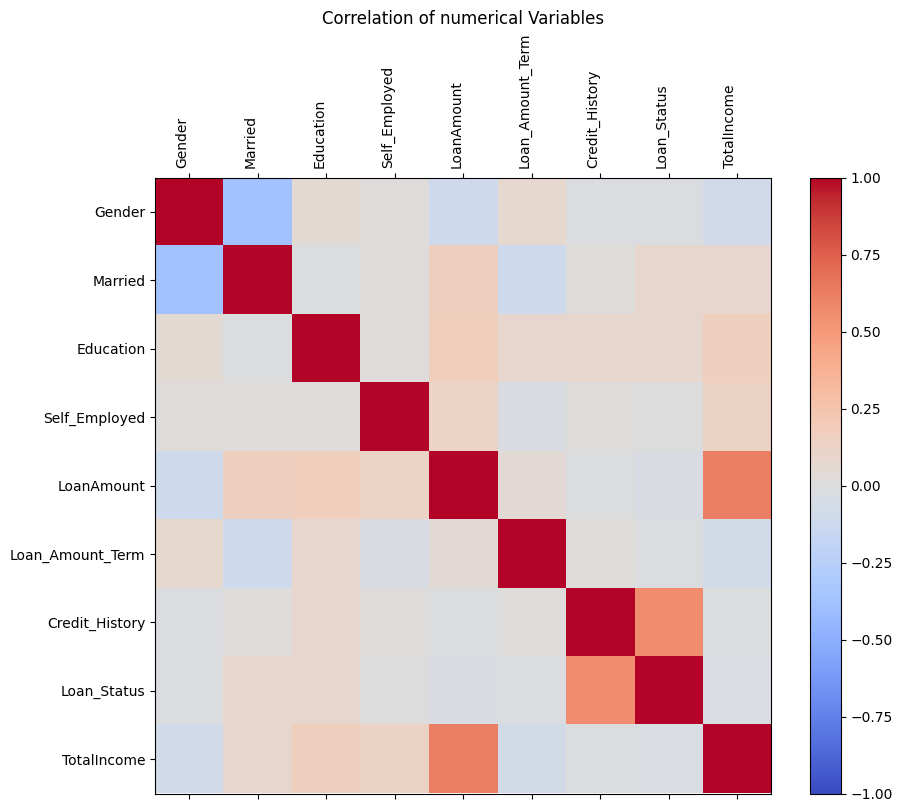

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

df = pd.read_csv("C:/Users/isabella.bismanns/Downloads/TechLabs/Projekt/TechLab_DSProjectTeam1/loan_data.csv", delimiter=";")
df.info()
print(df['Credit_History'])

df["CoapplicantIncome"]=pd.to_numeric(df["CoapplicantIncome"], errors="coerce") 


df["CoapplicantIncome"].mean()
df["CoapplicantIncome"].median()

df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

df.describe()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms in each subplot
axes[0].hist(df["ApplicantIncome"], bins=30, color='blue', edgecolor='black')
axes[0].set_title('ApplicantIncome')

axes[1].hist(df["CoapplicantIncome"], bins=30, color='red', edgecolor='black')
axes[1].set_title('CoapplicantIncome')

axes[2].hist(df["TotalIncome"], bins=30, color='green', edgecolor='black')
axes[2].set_title('TotalIncome')

plt.figure(figsize=(8, 6))

# Lohndaten für jede Gruppe (Geschlecht & Bildungsgrad)
income_male_grad = df[(df["Gender"] == 'Male') & (df['Education'] == 'Graduate')]['ApplicantIncome']
income_female_grad = df[(df["Gender"] == 'Female') & (df['Education'] == 'Graduate')]['ApplicantIncome']
income_male_nograd = df[(df["Gender"] == 'Male') & (df['Education'] == 'Not Graduate')]['ApplicantIncome']
income_female_nograd = df[(df["Gender"] == 'Female') & (df['Education'] == 'Not Graduate')]['ApplicantIncome']

# Violin-Diagramm für jede Gruppe erstellen
plt.violinplot([income_male_grad, income_female_grad, income_male_nograd, income_female_nograd], showmeans=False, showmedians=True)

# X-Achse anpassen
plt.xticks([1, 2, 3, 4], ['Male & Graduate', 'Female & Graduate', 'Male & Not Graduate', 'Female & Not Graduate'])

# Diagrammtitel und Achsenbeschriftungen hinzufügen
plt.title('Violin-Diagram of Income regarding Gender and Education')
plt.xlabel('Category')
plt.ylabel('Applicant Income')

# Diagramm anzeigen
plt.show()

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df["Education"]=df["Education"].map({'Not Graduate': 0, 'Graduate': 1})
df["Self_Employed"]=df["Self_Employed"].map({'No': 0, 'Yes': 1})
df["Loan_Status"]=df["Loan_Status"].map({'N': 0, 'Y': 1})
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
# Spalten, die du entfernen möchtest
columns_to_drop = ['ApplicantIncome', 'CoapplicantIncome']

# Entferne diese Spalten aus der Liste
numerical_columns = [col for col in numerical_columns if col not in columns_to_drop]
correlation_matrix=df[numerical_columns].corr()
print(correlation_matrix)

fig, ax = plt.subplots(figsize=(10, 8))

# Definieren der Farbskala
cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Erstellen der Heatmap
cax = ax.matshow(correlation_matrix, cmap=cmap, norm=norm)

# Hinzufügen von Farbskala
fig.colorbar(cax)

# Beschriftungen der Achsen
ax.set_xticks(np.arange(len(numerical_columns)))
ax.set_yticks(np.arange(len(numerical_columns)))
ax.set_xticklabels(numerical_columns)
ax.set_yticklabels(numerical_columns)

plt.xticks(rotation=90, ha='right')


# Hinzufügen von Titeln und Labels
plt.title('Correlation of numerical Variables')


#Modell

# Features und Zielvariable
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df['Loan_Status']


# Definition der Imputer
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married',  'Education', 'Self_Employed']
categorical_features = ['Dependents', 'Property_Area']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline_logistic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modell trainieren
pipeline_logistic.fit(X_train, y_train)


# Wahrscheinlichkeiten vorhersagen
y_proba = pipeline_logistic.predict_proba(X_test)

y_proba_neu = pipeline_logistic.predict_proba(X_test)[:, 1]
threshold=0.575
y_pred_adjusted=(y_proba_neu>=threshold).astype(int)
print("Wahrscheinlichkeiten für die ersten 5 Testdatensätze:")
print(y_proba[:10])
print(y_proba_neu)
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))


print("Ergebnisse für die ersten 10 Testdatensätze:")
for i in range(10):
    print(f"Datensatz {i+1}:")
    print(f"  Vorhersage: {y_pred[i]}")
    print(f"  Neue Vorhersage: {y_pred_adjusted[i]}")
    print(f"  Tatsächlicher Loan_Status: {y_test.iloc[i]}")
    print(f"  Wahrscheinlichkeit: {y_proba[i]}")
    print()
    
print(y.value_counts())


y_proba_pos = pipeline_logistic.predict_proba(X_test)[:, 1]

# Histogramm der Wahrscheinlichkeiten erstellen
plt.figure(figsize=(10, 6))
plt.hist(y_proba_pos, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Predicted Probability for Loan_Status 1')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Pipeline für KNN erstellen
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # Hier wird K auf 5 gesetzt
])

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modell trainieren
pipeline_knn.fit(X_train, y_train)

# Vorhersagen machen
y_pred = pipeline_knn.predict(X_test)

# Ergebnisse auswerten
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#Logistic Regression delivers a higher precision and accuracy than the random forest model

